# 💡 Project1 : 원티드 국민연금 데이터를 활용하여 유니콘 기업 선정하기

## ⚡ SUMMARY

> **분석 목표** : 원티드 국민연금 데이터를 활용하여 유니콘 기업 선정하기 

> **분석 자료** : 기업의 국민연금 납부 데이터(2015-2019)

> **분석 근거** :   
    (1) 현재 존재하는 회사일 것(가장 최신 데이터인 2019년 12월 납부내역 데이터가 있을 것)   
    (2) 기업이 2년 이상 유지될 것   
    (3) 최소 직원 수가 40명 이상일 것   
    (4) 직원 수의 증가(직원 수 평균 증감율이 0 이상일 것)   
    (5) 연 평균 매출액 증감율 상승
    
> **분석 결론** : 유니콘 기업 선정(294367,420165,296819,510449,440559)

## ⚡ 목차

>### 1. 프로젝트 개요
>### 2. 유니콘 기업 정의
>### 3. EDA 및 분석
>### 4. 최종 유니콘 기업 선정

## ⚡ 1. 프로젝트 개요

원티드는 채용 플랫폼으로 회사와 구직자 양측에 양질의 정보를 제공하고자 기업 분석을 하려고 한다.  
최근 크레딧잡이라는 국민연금 데이터 기반으로 기업 평균 연봉 정보를 공유하는 회사를 인수하며 국민연금 납부 내역 데이터를 확보하게 되었다. ***국민연금 데이터를 활용하여 될성부른 떡잎인 유니콘 회사를 찾아보자 !***

<U>기본 데이터:</U> 원티드의 국민연금 납부 내역 기업 리스트 데이터(2015-2019)를 사용한다.   

<U>가정:</U> 
- 유니콘 회사란 기업 가치가 1조 원 이상이고 창업한 지 10년 이하인 비상장 스타트업으로 정의한다.

- 현 데이터는 국민연금으로부터 제공받은 15-19년도 데이터 전부이다 (데이터는 유실되지 않았다. 예를 들어, A라는 회사가 18년도까지의 납부 내역은 있지만 19년도 데이터가 없다면 이는 없어진 회사로 간주한다)

## ⚡ 2. 유니콘 기업 정의 


### 1) 유니콘 기업의 정의 
1) 기업 가치가 10억 달러(=1조 원) 이상이고   
2) 창업한지 10년 이하인 비상장 스타트업  
출저: 위키백과 https://ko.wikipedia.org/wiki/%EC%9C%A0%EB%8B%88%EC%BD%98_%EA%B8%B0%EC%97%85

### 2) 유니콘 기업 사례 탐구

주어진 데이터가 국민연금 데이터임을 고려할 때, 찾고자 하는 유니콘 기업도 한국 기업이므로 한국 내 유니콘 기업들의 종류와 특징을 살펴보고 향후 유니콘 기업 선발 기준으로 활용하고자 한다. 

<U>유니콘 기업(2021.08 기준)</U>: 옐로모바일, 엘앤피코스메틱 ,크래프톤, 비바리퍼블리카, 야놀자, 위메프, 지피클럽, 무신사, 에이프로젠, 쏘카, 컬리, 티몬, 두나무, 직방   

<U>유니콘 기업들의 특징</U>   
- 유니콘 기업의 직원 수는 최소 40명 - 1000명 미만이다.(유니콘 기업 선정 시점 기준)   
(예. 지피클럽의 경우 2018.10월 유니콘 기업 선정 당시 직원 수 44명. 야놀자의 경우 2019.6월 유니콘 기업 선정 당시 직원 수 615명)


- 창업 후 유니콘 기업까지 걸리는 시간은 최소 2년 이상이다.   
(예. 옐로모바일/2년 3개월/2012.8 - 2014.11)   


- 매출이 정체하고 있더라도 직원 수 증가하는 경향이 있다.   


- 매출에 변동성이 많다.   
매출이 급등하는 회사도 있고 반대로 매출이 감소했던 기업도 있다. 


### 3) 프로젝트에서 활용할 유니콘 기업의 조건

(1) 현재 존재하는 회사일 것(가장 최신 데이터인 2019년 12월 납부내역 데이터가 있을 것)   

(2) 기업이 2년 이상 유지될 것   

(3) 최소 직원 수가 40명 이상일 것

(4) 직원 수의 증가(직원 수 평균 증감율이 0 이상일 것)

(5) 연 평균 매출액 증감율 상승  

## ⚡ 3. EDA 및 분석

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('./data/company_nps_data.csv')

* 회사의 총 개수:  
    - 회사ID별 중복을 제거하니 데이터 내 회사는 5000개이다.    
    - 5000개 회사 중 유니콘 회사 찾기! 

In [4]:
train.shape

(99801, 6)

In [5]:
train.회사ID.value_counts()

250472     50
404192     50
128174     50
395238     50
135668     50
           ..
246979      1
105360      1
287627      1
573329      1
1983879     1
Name: 회사ID, Length: 5000, dtype: int64

### 📈 유니콘 회사가 되기 위한 조건 1_현재 존재하는 회사일 것

+ 가장 최신 데이터인 2019년 12월 납부내역이 있어야 한다  
5000개 기업 중 현재 존재하는 회사는 74개.

In [6]:
train.loc[(train['년도']==2019) & (train['월']==12)].value_counts('회사ID')

회사ID
2037       1
440559     1
428380     1
420165     1
419945     1
          ..
237625     1
212335     1
205415     1
193239     1
5159723    1
Length: 74, dtype: int64

* 분석 데이터에서 존재하는 회사 데이터만 남기기(회사 ID 74개)

In [7]:
train_F1 = train[train.회사ID.isin([256445,2037,343863,173916,130756,419945,130023,440911,155754,337323,270460,581504,434171,620445,135668,428380,404192,165163,332916,441424,395238,193239,155829,250472,237625,401386,8208,128174,368448,177377,264486,138077,315996,294028,258745,442798,442525,158004,205415,510449,134575,246826,338722,294367,263195,570867,280967,254479,440559,443698,2693684,442376,3312354,440884,131998,5159723,296819,192812,140370,255015,47306,473265,420165,139442,14271,305146,212335,297542,478922,303882,130261,297682,445499,442467])]
len(train_F1.회사ID.unique())

74

* 이상값 확인:  
    연금보험료 또는 직원수가 0인 회사가 있는지 확인  
    현재 필터링된 데이터 내에서는 이상값 없음

In [8]:
train_F1.loc[(train_F1['월별_연금보험료']==0) | train_F1['월별_직원수']==0]

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수


### 📈 유니콘 회사가 되기 위한 조건 2_기업이 2년 이상 유지될 것

+ 2019년 12월에 존재하는 회사 중 납부내역이 2년 이상 있는 회사는 54개

In [9]:
train_F1['회사ID'].value_counts()[lambda x: x>=24].index.tolist() # 24개월 이상

[404192,
 130756,
 250472,
 395238,
 442467,
 135668,
 237625,
 442525,
 138077,
 128174,
 296819,
 134575,
 14271,
 155754,
 192812,
 478922,
 165163,
 419945,
 303882,
 280967,
 305146,
 445499,
 428380,
 434171,
 297542,
 130023,
 297682,
 263195,
 177377,
 442798,
 473265,
 294367,
 205415,
 442376,
 440559,
 510449,
 420165,
 130261,
 173916,
 212335,
 140370,
 158004,
 155829,
 270460,
 440911,
 401386,
 256445,
 337323,
 193239,
 332916,
 131998,
 368448,
 139442,
 264486]

* 분석 데이터에서 존재하는 회사 데이터만 남기기(회사 ID 54개)

In [10]:
train_F2 = train_F1[train_F1.회사ID.isin([404192,130756,250472,395238,442467,135668,237625,442525,138077,128174,296819,134575,14271,155754,192812,478922,165163,419945,303882,280967,305146,445499,428380,434171,297542,130023,297682,263195,177377,442798,473265,294367,205415,442376,440559,510449,420165,130261,173916,212335,140370,158004,155829,270460,440911,401386,256445,337323,193239,332916,131998,368448,139442,264486])]
len(train_F2.회사ID.unique())

54

### 📈 유니콘 회사가 되기 위한 조건3_최소 직원 수가 40명 이상일 것    

기간 중 1회 이상 직원수가 40명 이상일 것(회사 23개)

In [11]:
train_F2[train_F2['월별_직원수']>=40].회사ID.unique()

array([420165, 130756, 510449, 134575, 131998, 138077, 404192, 128174,
       297542, 294367, 130261, 440559, 297682, 419945, 440911, 442467,
       130023, 296819, 473265, 135668, 442376, 395238, 140370],
      dtype=int64)

In [12]:
len(train_F2[train_F2['월별_직원수']>=40].회사ID.unique())

23

* 분석 데이터에서 존재하는 회사 데이터만 남기기(회사 ID 23개)

In [13]:
train_F3 = train_F2[train_F2.회사ID.isin([420165, 130756, 510449, 134575, 131998, 138077, 404192, 128174,297542, 294367, 130261, 440559, 297682, 419945, 440911, 442467,130023, 296819, 473265, 135668, 442376, 395238, 140370])]
train_F3.회사ID.value_counts()

130756    50
442467    50
128174    50
395238    50
296819    50
138077    50
134575    50
404192    50
135668    50
419945    48
130023    38
473265    38
294367    38
297542    38
297682    38
442376    36
420165    36
440559    36
130261    36
510449    36
140370    32
440911    24
131998    24
Name: 회사ID, dtype: int64

### 📈 유니콘 회사가 되기 위한 조건4_직원 수의 증가(직원 수 평균 증감율이 0 이상일 것)  

전체 기간 동안 직원 수가 증가할 것(직원 수 평균 증가율이 0 이상일 것) 

* 분석 데이터에서 존재하는 회사 데이터만 남기기(회사 ID 9개)

In [14]:
train_F4 = train_F3[train_F3.회사ID.isin([294367,296819,297682,404192,420165,440559,440911,473265,510449])]
train_F4.회사ID.value_counts()

404192    50
296819    50
473265    38
297682    38
294367    38
440559    36
420165    36
510449    36
440911    24
Name: 회사ID, dtype: int64

### 📈 유니콘 회사가 되기 위한 조건 5_연평균 매출액 증감율 상승

전체 기간 동안 매출액 증감율이 0이상일 것(기하평균 사용)

* 분석 데이터에서 존재하는 회사 데이터만 남기기(회사 ID 7개)

In [15]:
train_F5 = train_F4[train_F4.회사ID.isin([294367,296819,404192,420165,440559,440911,510449])]
train_F5.회사ID.value_counts()

404192    50
296819    50
294367    38
440559    36
420165    36
510449    36
440911    24
Name: 회사ID, dtype: int64

## ⚡ 4. 최종 유니콘 기업 선정

2020년도 예상 실적이 가장 높은 순으로 유니콘 기업 선정   
2020년 예상 실적: 첫해 매출액 * ( 1 + 연평균 성장률 ) ^ (예상 연도-첫 연도)  

eg.2020년 예상 매출액 구하기  
2015 - 2019년 데이터가 존재하고 첫해 매출액은 500, 연평균 성장률은 2%라고 가정할 때  
=500*(1+2)^(2019-2015+1)=121,500


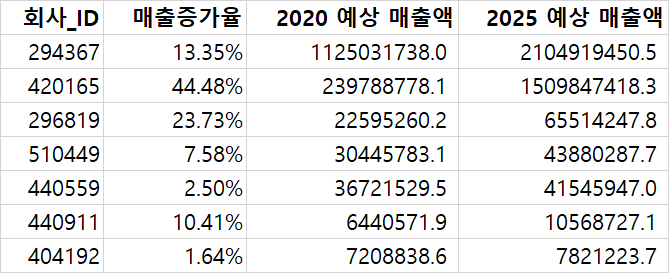

2025년 기준 상위 5개 기업 선정: 294367,420165,296819,510449,440559